In [1]:
import pandas as pd
import numpy as np

#set up the random seed
seed = 7
np.random.seed(seed)

#using pandas to read the data form csv and get the feature varibales from table
dataframe = pd.read_csv("extrastate.csv")
featureSet =['combat_location','side1_code','side2_code','state_fatalities','nonstate_fatalities','intervention']


# split into input (X) and output (Y) variables
X = dataframe[featureSet].astype(float)
Y = dataframe['outcome']

In [2]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

# split the train,and test set with the anaylze data and target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33,random_state =7)

# initial one hot encoded
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# fitting the X_train in the hot encode
ohe.fit(X_train)
#transform the analyzed variable in to the combiantion fearture set 
X_train_encoded = ohe.transform(X_train)
X_test_encoded = ohe.transform(X_test)
#geting the size of feature 
data_length = len(ohe.get_feature_names())
# using labelencode to encode the output data in to 0,1 matrix 
encoder = preprocessing.LabelEncoder()
encoder.fit(y_test)
#tranform the data and enforce the data match the diminson 
encoded_y_test = encoder.transform(y_test)
dummy_y_test = np_utils.to_categorical(encoded_y_test,data_length)

encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train,data_length)


Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from sklearn.model_selection import train_test_split
import datetime

# creat a sequential model with data_length variable input and 10 hidden layer.

def create_model(): 
    model = Sequential() 
    model.add(Dense(10, input_dim=data_length, activation="relu")) 

    model.add(Dense(6, activation="relu")) 
    #data_length output 
    model.add(Dense(data_length, activation="softmax")) 
# multiple class using the categorical_crossentropy as loss funtiona
# adam for optimizer, since adam has a good performance for mutiple class classifation
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"]) 
    return model
#init the kerasclassfier with training 100 epochs 
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=15)

#taining the data and verify it by the test set created above
history=model.fit(X_train_encoded,dummy_y_train,validation_data=(X_test_encoded,dummy_y_test))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 132 samples, validate on 66 samples
Epoch 1/100
132/132 [==============================] - 2s 17ms/step - loss: 5.0823 - acc: 0.4242 - val_loss: 5.0705 - val_acc: 0.5455
Epoch 2/100
132/132 [==============================] - 0s 614us/step - loss: 5.0582 - acc: 0.5985 - val_loss: 5.0450 - val_acc: 0.5909
Epoch 3/100
132/132 [==============================] - 0s 598us/step - loss: 5.0290 - acc: 0.6212 - val_loss: 5.0114 - val_acc: 0.5758
Epoch 4/100
132/132 [==============================] - 0s 591us/step - loss: 4.9872 - acc: 0.6212 - val_loss: 4.9620 - val_acc: 0.6061
Epoch 5/100
132/132 [==============================] - 0s 614us/step - loss: 4.9256 - acc: 0.6288 - val_loss: 4.8913 - val_acc: 0.6061
Epoch 6/100
132/132 [==============================] - 0s 538us/step - loss: 4.8391 - acc: 0.6288 - val_loss: 4.7962 - val_acc: 0.6061
Epoch 7/100
132/132 [=========================

Epoch 50/100
132/132 [==============================] - 0s 492us/step - loss: 1.1195 - acc: 0.6288 - val_loss: 1.2266 - val_acc: 0.6061
Epoch 51/100
132/132 [==============================] - 0s 485us/step - loss: 1.1116 - acc: 0.6288 - val_loss: 1.2230 - val_acc: 0.6061
Epoch 52/100
132/132 [==============================] - 0s 561us/step - loss: 1.1043 - acc: 0.6288 - val_loss: 1.2187 - val_acc: 0.6061
Epoch 53/100
132/132 [==============================] - 0s 553us/step - loss: 1.0963 - acc: 0.6288 - val_loss: 1.2141 - val_acc: 0.6061
Epoch 54/100
132/132 [==============================] - 0s 462us/step - loss: 1.0881 - acc: 0.6288 - val_loss: 1.2112 - val_acc: 0.6061
Epoch 55/100
132/132 [==============================] - 0s 477us/step - loss: 1.0796 - acc: 0.6288 - val_loss: 1.2064 - val_acc: 0.6061
Epoch 56/100
132/132 [==============================] - 0s 477us/step - loss: 1.0714 - acc: 0.6288 - val_loss: 1.2005 - val_acc: 0.6061
Epoch 57/100
132/132 [==========================

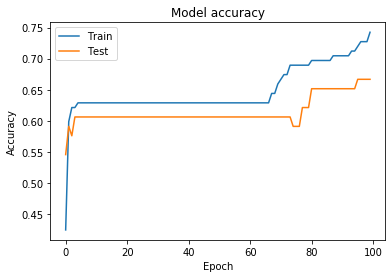

In [4]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

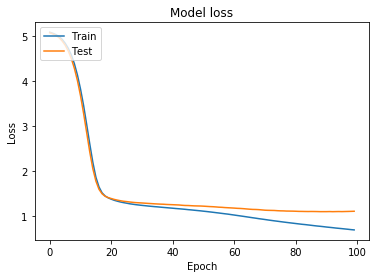

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#encodeing X 
ohe_fold = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_fold.fit(X)
X_fold_encoded = ohe_fold.transform(X)


data_fold_length = len(ohe_fold.get_feature_names())
#encoding Y
encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
#tranform the data and enforce the data set as data_length to macth the input
encoded_Y = encoder.transform(Y)

dummy_Y = np_utils.to_categorical(encoded_Y,data_fold_length)


def create_model_fold(): 
    model = Sequential() 
    model.add(Dense(10, input_dim=data_fold_length, activation="relu")) 

    model.add(Dense(8,activation="relu"))
    model.add(Dense(data_fold_length, activation="softmax")) 
# multiple class using the categorical_crossentropy as loss funtiona
# adam for optimizer, since adam has a good performance for mutiple class classifation
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"]) 
    return model


In [7]:
#init the kerasclassfier with training 10 epochs 
model = KerasClassifier(build_fn=create_model_fold, epochs=10, batch_size=15)

#estimate the model with the kold and oouput the result


estimator = KerasClassifier(build_fn=create_model_fold, epochs=10, batch_size=5, verbose=0)
#10 time fold and cross with the shuffle data  
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#receive the score
results = cross_val_score(estimator, X_fold_encoded, dummy_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 62.11% (10.15%)


In [8]:
from keras.wrappers.scikit_learn import KerasRegressor
def create_model_re(): 
    model = Sequential() 
    model.add(Dense(10, input_dim=data_length, activation="relu")) 

    model.add(Dense(data_length)) 
    #regression is based on mean_square_error
    model.compile(loss="mse", optimizer="adam", metrics=["acc","mse"]) 
    return model
#using KerasRegressor as regression fucnction
model = KerasRegressor(build_fn=create_model_re, epochs=40, batch_size=10)
history=model.fit(X_train_encoded,dummy_y_train,validation_data=(X_test_encoded,dummy_y_test))


Train on 132 samples, validate on 66 samples
Epoch 1/40
132/132 [==============================] - 1s 8ms/step - loss: 0.0093 - acc: 0.0000e+00 - mean_squared_error: 0.0093 - val_loss: 0.0077 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.0077
Epoch 2/40
132/132 [==============================] - 0s 833us/step - loss: 0.0074 - acc: 0.0227 - mean_squared_error: 0.0074 - val_loss: 0.0068 - val_acc: 0.0758 - val_mean_squared_error: 0.0068
Epoch 3/40
132/132 [==============================] - 0s 758us/step - loss: 0.0067 - acc: 0.0909 - mean_squared_error: 0.0067 - val_loss: 0.0064 - val_acc: 0.1818 - val_mean_squared_error: 0.0064
Epoch 4/40
132/132 [==============================] - 0s 682us/step - loss: 0.0063 - acc: 0.2348 - mean_squared_error: 0.0063 - val_loss: 0.0061 - val_acc: 0.3182 - val_mean_squared_error: 0.0061
Epoch 5/40
132/132 [==============================] - 0s 720us/step - loss: 0.0060 - acc: 0.3636 - mean_squared_error: 0.0060 - val_loss: 0.0058 - val_acc: 0.4545 - 

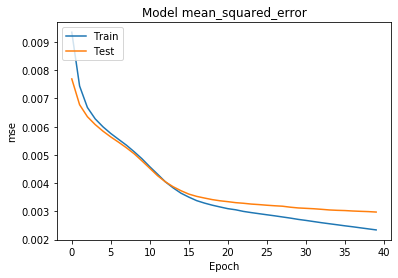

In [9]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()